In [ ]:
#using one hot encoded data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix 

from sklearn import tree
from sklearn import preprocessing

In [73]:
X = pd.read_pickle("data/X_train_ohe.pickle")
y = pd.read_pickle("y_train_encoded.pickle")

# cols = [c for c in X.columns if c.split('_')[-1] != 'code']

# lst = ['gps_height', 'longitude', 'latitude', 'population']
# for i in lst:
#     cols.remove(i)
    
# X = X.drop(columns = cols)

y = y['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [74]:
NB = GaussianNB()

In [75]:
NB.fit(X_train, y_train)

GaussianNB()

In [76]:
NB.score(X_train, y_train)

0.6009816832275829

In [77]:
NB.score(X_test, y_test)

0.6129466690608727

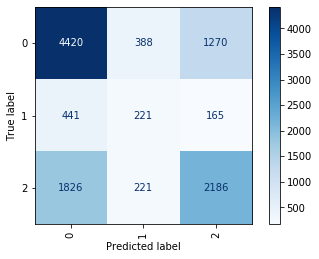

In [78]:
plot_confusion_matrix(NB, X_test, y_test, cmap = "Blues", xticks_rotation  = "vertical")

In [12]:
dt = DecisionTreeClassifier()

dt_model = dt.fit(X_train, y_train)
dt_model.score(X_test, y_test)

0.7363081343149578

In [13]:
forest1 = RandomForestClassifier(random_state = 47)
forest1.fit(X_train, y_train)
forest1.score(X_test, y_test)

0.7862273298617346

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
params = {
    'random_state': 47,
    'criterion' : ["gini", "entropy"],
    'max_depth' : [3, 5, 10],
    'min_samples_split' : [2, 50],
    'min_samples_leaf' : [20, 50],
    'max_features' : [5, 10],
    'bootstrap' : [True],
}

gs = GridSearchCV(forest1, params)

NameError: name 'forest' is not defined

In [115]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': [10, 15], 'max_features': [10, 15],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5], 'random_state': [47]})

In [108]:
gs.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'random_state': 47}

In [16]:
params2 = {
    'bootstrap' : [True],
    'random_state': [47],
    'criterion' : ["gini"],
    
    'max_depth' : [10, 15],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [10, 20],
    'max_features' : [10, 15],
}

gs2 = GridSearchCV(forest, params)

NameError: name 'forest' is not defined

In [116]:
gs2.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'random_state': 47}

In [122]:
forest2 = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_features = 10, max_depth = 10, min_samples_leaf = 20, min_samples_split = 3, random_state = 47)
forest2.fit(X_train, y_train)
forest2.score(X_test, y_test)

0.7504938049919195

In [17]:
forest3 = RandomForestClassifier(bootstrap = True, criterion = 'gini', random_state = 47, max_depth = 15, min_samples_leaf = 10, min_samples_split = 2)
forest3.fit(X_train, y_train)
forest3.score(X_test, y_test)

0.7434009696534387

In [18]:
y_test_pred = forest3.predict(X_test)

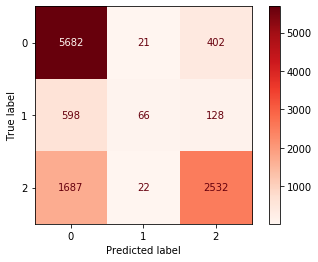

In [19]:
plot_confusion_matrix(forest3, X_test, y_test, cmap = "Reds")

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,261,index,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
37653,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,32114,200.0,1007,36.705840,-8.665994,5,4,15,2004
8211,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,53800,0.0,274,36.899166,-7.796632,5,3,510,1973
38826,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,47493,50.0,1666,34.556802,-1.354437,20,1,700,2007
14445,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,25985,0.0,0,33.749123,-3.073936,17,2,0,0
22110,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,33343,0.0,0,30.960648,-2.804334,18,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,31174,200.0,964,35.898092,-10.195426,10,5,1250,1998
38366,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,52092,0.0,1789,38.194332,-4.653468,4,1,1,1967
38303,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,53117,0.0,0,33.380346,-3.132556,19,4,0,0
1743,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,45235,0.0,336,36.353094,-8.800886,5,4,1,1995


In [25]:
# X_train_knn = X_train[['latitude', 'longitude', 'gps_height', 'basin_code', 'district_code', 'management_code']]
# X_test_knn = X_test[['latitude', 'longitude', 'gps_height', 'basin_code', 'district_code', 'management_code']]

In [36]:
KNN = KNeighborsClassifier(weights = 'distance', n_neighbors = 3)

In [37]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [38]:
KNN.score(X_test, y_test)

0.5000897827258035

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer


In [27]:
ss = StandardScaler()

X_train_scales = ss.fit_transform(X_train)
X_test_scales = ss.transform(X_test)

In [28]:
forest3.fit(X_train_scales, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=10, random_state=47)

In [29]:
forest3.score(X_test_scales, y_test)

0.7434009696534387

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


In [81]:
pipe1 = make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(bootstrap = True, criterion = 'gini', 
                           random_state = 47, max_depth = 30, 
                           min_samples_leaf = 15, min_samples_split = 2
))

pipe1.fit(X_train, y_train)
pipe1.score(X_test, y_test)

0.75202011133058

In [51]:
y.unique()

array([0, 2, 1], dtype=int64)

In [55]:
pipe2 = make_pipeline(
    MinMaxScaler(),
    DecisionTreeClassifier())

pipe2.fit(X_train, y_train)
pipe2.score(X_test, y_test) 

0.7103609265577303

In [61]:
RandomForestClassifier(bootstrap = True, criterion = 'gini', random_state = 47, max_depth = 30, min_samples_leaf = 15, min_samples_split = 2)

, ,


C:\Users\Raven (Work)\.conda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Raven (Work)\.conda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Raven (Work)\.conda\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 330, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\Users\Raven (Work)\.conda\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py", line 604, in _validate_y_class_weight
    y_original)
  File "C:\Users\Raven (Work)\.conda\envs\learn-env\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\Raven (Work)\.conda\envs\learn-env\lib\site-

0.6627760818818459

In [33]:
from sklearn.metrics import classification_report

In [34]:
y_test_pred = forest3.predict(X_test)

In [35]:
print(classification_report(y_test, y_test_pred, target_names = ['functional', 'functional needs repair', 'non functional']))

                         precision    recall  f1-score   support

             functional       0.55      1.00      0.71      6105
functional needs repair       0.00      0.00      0.00       792
         non functional       0.00      0.00      0.00      4241

               accuracy                           0.55     11138
              macro avg       0.18      0.33      0.24     11138
           weighted avg       0.30      0.55      0.39     11138



C:\Users\Raven (Work)\.conda\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [194]:
y.value_counts()

0    24237
2    17102
1     3211
Name: status_group, dtype: int64

In [193]:
import plotly.graph_objects as go

In [ ]:
labels = ['Functional', 'Non-Functional', "Functional, Needs Repair"]
values = [24237, ]

In [41]:
from imblearn.over_sampling import SMOTE